# 1. Load Data

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X).

The variables can be summarized as follows:

Input Variables (X):  

- Number of times pregnant  
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
- Diastolic blood pressure (mm Hg)  
- Triceps skin fold thickness (mm)  
- 2-Hour serum insulin (mu U/ml)  
- Body mass index (weight in kg/(height in m)^2)  
- Diabetes pedigree function  
- Age (years)  
- Output Variables (y):  

Class variable (0 or 1)
Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g. [rows, columns].

In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

We can split the array into two arrays by selecting subsets of columns using the standard NumPy slice operator or “:” We can select the first 8 columns from index 0 to index 7 via the slice 0:8. We can then select the output column (the 9th variable) via index 8.

In [3]:
# load the dataset
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# 2. Define Keras Model

We can piece it all together by adding each layer:

- The model expects rows of data with 8 variables (the input_dim=8 argument)  
- The first hidden layer has 12 nodes and uses the relu activation function.  
- The second hidden layer has 8 nodes and uses the relu activation function.  
- The output layer has one node and uses the sigmoid activation function.  

In [4]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


2021-08-16 21:33:07.402825: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Visualize Model

The summary is useful for simple models, but can be confusing for models that have multiple inputs or outputs.

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

model: (required) The model that you wish to plot.
to_file: (required) The name of the file to which to save the plot.
show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.
Below is the updated example that plots the created model.

Note, the example assumes that you have the [graphviz graph library](https://www.graphviz.org/) and the [Python interface](https://pypi.python.org/pypi/graphviz) installed.  

In [8]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# 3. Compile Keras Model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

## Choose loss function  

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“. You can learn more about choosing loss functions based on your problem here:

[How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)  

This tutorial is divided into three parts; they are:

Regression Loss Functions  
- Mean Squared Error Loss
- Mean Squared Logarithmic Error Loss
- Mean Absolute Error Loss  

Binary Classification Loss Functions  
- Binary Cross-Entropy  
- Hinge Loss  
- Squared Hinge Loss  

Multi-Class Classification Loss Functions
- Multi-Class Cross-Entropy Loss
- Sparse Multiclass Cross-Entropy Loss
- Kullback Leibler Divergence Loss


We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. To learn more about the Adam version of stochastic gradient descent see the post:

[Gentle Introduction](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) to the Adam Optimization Algorithm for Deep Learning
Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Fit Keras Model

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.  

- **Epoch**: One pass through all of the rows in the training dataset.
- **Batch**: One or more samples considered by the model within an epoch before weights are updated.  

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. For more on the difference between epochs and batches, see the post:  

- [What is the Difference](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) Between a Batch and an Epoch in a Neural Network?  

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

In [10]:

# fit the keras model on the dataset
# history = model.fit(X, y, epochs=150, batch_size=10)
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

2021-08-16 21:35:09.392658: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


This is where the work happens on your CPU or GPU.

No GPU is required for this example, but if you’re interested in how to run large models on GPU hardware cheaply in the cloud, see this post:

[How to Setup Amazon AWS EC2 GPUs to Train Keras Deep Learning Models](https://machinelearningmastery.com/develop-evaluate-large-deep-learning-models-keras-amazon-web-services/)

# 5. Plot the learning curve  

The plots are provided below. The history for the validation dataset is labeled test by convention as it is indeed a test dataset for the model.

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


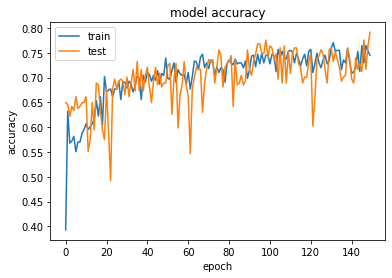

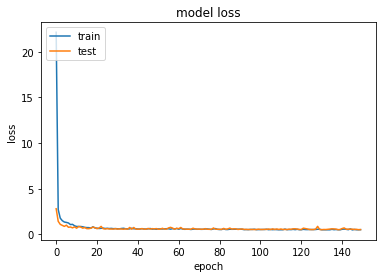

In [11]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5. Evaluate Keras Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the **evaluate()** function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The **evaluate()** function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.

In [12]:

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 972us/step - loss: 0.5031 - accuracy: 0.7773
Accuracy: 77.73


# 6. Make Predictions  

The number one question I get asked is:

After I train my model, how can I use it to make predictions on new data?

Great question.

We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset we have not seen before.

Making predictions is as easy as calling the predict() function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [9]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

# 7. Save the model  

The model is then converted to JSON format and written to model.json in the local directory. The network weights are written to model.h5 in the local directory.  

In [10]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# 8. Reload model and predict  

The model and weight data is loaded from the saved files and a new model is created. It is important to compile the loaded model before it is used. This is so that predictions made using the model can use the appropriate efficient computation from the Keras backend.

The model is evaluated in the same way printing the same evaluation score.  

In [11]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

NameError: name 'model_from_json' is not defined